In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import randint

In [2]:
df = pd.read_csv("data.csv")

assert df.isna().sum().sum() == 0, "df contains missing values"

In [3]:
df.head(3).T

0         1           2
Time      0.000000  0.000000    1.000000
V1       -1.359807  1.191857   -1.358354
V2       -0.072781  0.266151   -1.340163
V3        2.536347  0.166480    1.773209
V4        1.378155  0.448154    0.379780
V5       -0.338321  0.060018   -0.503198
V6        0.462388 -0.082361    1.800499
V7        0.239599 -0.078803    0.791461
V8        0.098698  0.085102    0.247676
V9        0.363787 -0.255425   -1.514654
V10       0.090794 -0.166974    0.207643
V11      -0.551600  1.612727    0.624501
V12      -0.617801  1.065235    0.066084
V13      -0.991390  0.489095    0.717293
V14      -0.311169 -0.143772   -0.165946
V15       1.468177  0.635558    2.345865
V16      -0.470401  0.463917   -2.890083
V17       0.207971 -0.114805    1.109969
V18       0.025791 -0.183361   -0.121359
V19       0.403993 -0.145783   -2.261857
V20       0.251412 -0.069083    0.524980
V21      -0.018307 -0.225775    0.247998
V22       0.277838 -0.638672    0.771679
V23      -0.110474  0.101288    0.909412
V24       0.066928 -0.339846   -0.689281
V25       0.128539  0.167170   -0.327642
V26      -0.189115  0.125895   -0.139097
V27       0.133558 -0.008983   -0.055353
V28      -0.021053  0.014724   -0.059752
Amount  149.620000  2.690000  378.660000
Class     0.000000  0.000000    0.000000

In [4]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [5]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
def confusion_matrix_metrics(conf_matrix: np.ndarray) -> dict:
    """
    Calculate and display metrics based on a 2x2 confusion matrix.

    Args:
        conf_matrix (np.ndarray): A 2x2 confusion matrix.

    Returns:
        dict: A dictionary containing the following metrics:
            - TP (True Positive)
            - TN (True Negative)
            - FP (False Positive)
            - FN (False Negative)
            - Accuracy
            - Precision
            - Recall
            - F1 Score
    """
    assert conf_matrix.shape == (2, 2), "Confusion matrix must be a 2x2 matrix"

    tn, fp, fn, tp = conf_matrix.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    return {
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "Accuracy ": f"{accuracy * 100:.2f}%",
        "Precision": f"{precision * 100:.2f}%",
        "Recall   ": f"{recall * 100:.2f}%",
        "F1 Score ": f"{f1_score * 100:.2f}%",
    }

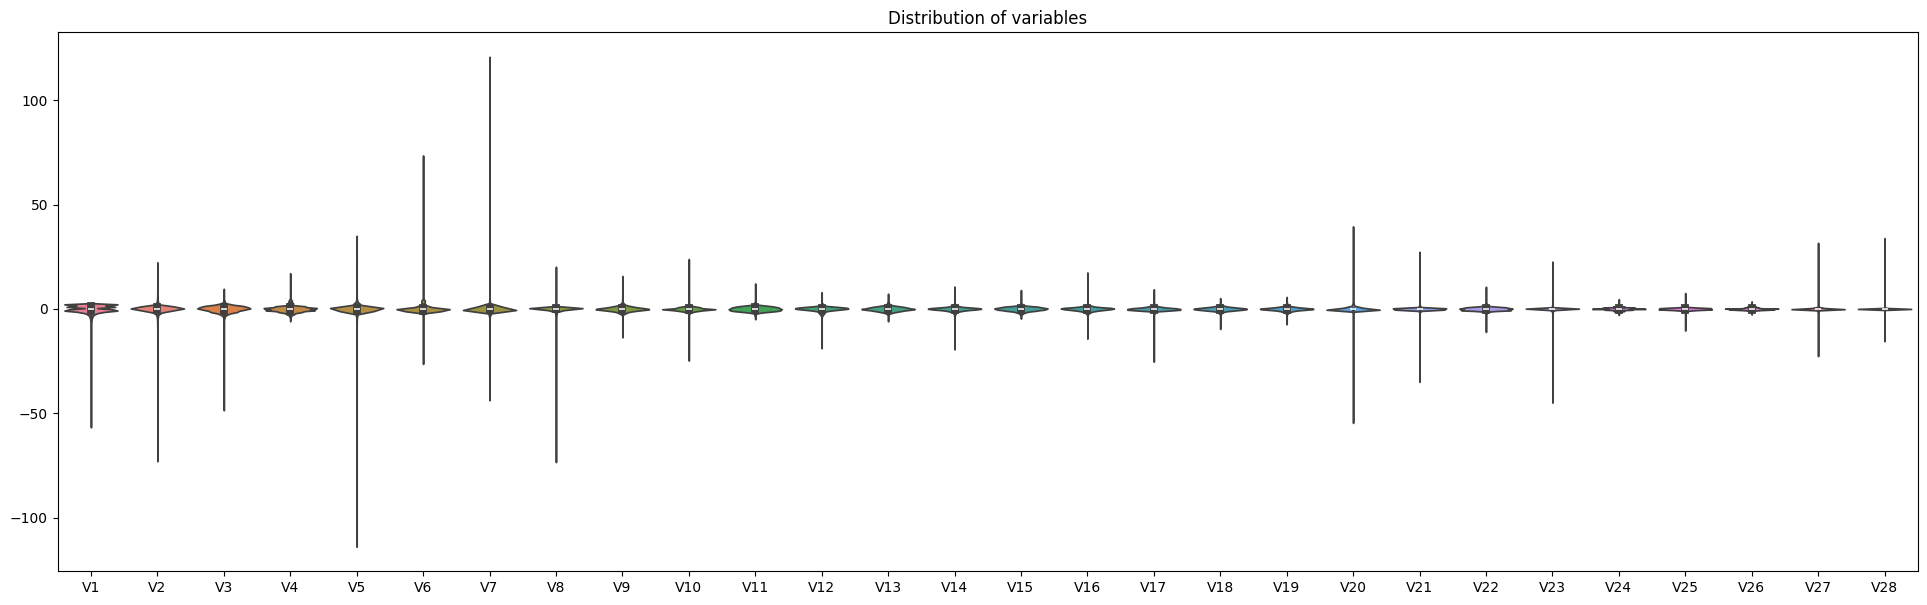

In [7]:
plt.figure(figsize=(24, 7))
sns.violinplot(data=df.drop(columns=["Class", "Time", "Amount"]))
plt.title("Distribution of variables")
plt.show()

In [8]:
scaler = StandardScaler()

X = df.drop(columns=["Class"])
y = df["Class"]

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.75, random_state=123
)

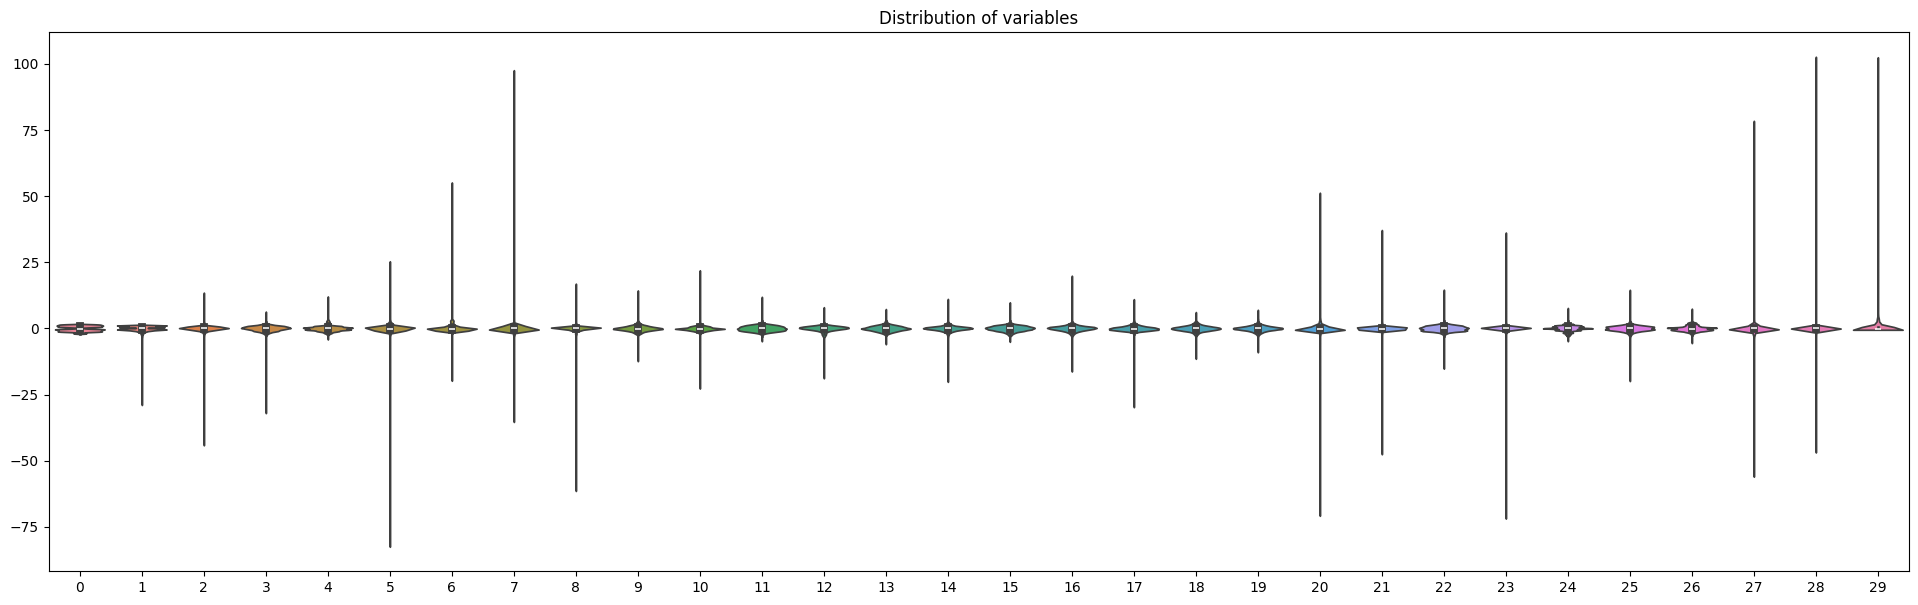

In [9]:
plt.figure(figsize=(24, 7))
sns.violinplot(data=X_scaled)
plt.title("Distribution of variables")
plt.show()

In [10]:
lr_model = LogisticRegression(max_iter=100_000)

lr_model.fit(X_train, y_train)
predicted_probabilities = lr_model.predict_proba(X_test)[:, 1]

threshold = 0.19

lr_y_pred = (predicted_probabilities >= threshold).astype(int)

lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)

confusion_matrix_metrics(lr_conf_matrix)

{'TP': 283,
 'TN': 213150,
 'FP': 74,
 'FN': 99,
 'Accuracy ': '99.92%',
 'Precision': '79.27%',
 'Recall   ': '74.08%',
 'F1 Score ': '76.59%'}

In [11]:
nb_model = BernoulliNB()

nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

nb_conf_matrix = confusion_matrix(nb_y_pred, y_test)
confusion_matrix_metrics(nb_conf_matrix)

{'TP': 248,
 'TN': 213171,
 'FP': 134,
 'FN': 53,
 'Accuracy ': '99.91%',
 'Precision': '64.92%',
 'Recall   ': '82.39%',
 'F1 Score ': '72.62%'}

In [12]:
xgb = XGBClassifier()

xgb_param_dist = {
    "n_estimators": randint(10, 200),
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3],
    "max_depth": randint(1, 20),
    "min_child_weight": randint(1, 10),
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4],
    "reg_alpha": [0, 0.1, 0.2, 0.3, 0.4],
    "reg_lambda": [0, 0.1, 0.2, 0.3, 0.4],
}

xgb_random_search = RandomizedSearchCV(
    xgb,
    param_distributions=xgb_param_dist,
    n_iter=50,
    scoring="recall",
    cv=5,
    n_jobs=-1,
    random_state=123,
)

xgb_random_search.fit(X_train, y_train)
best_xgb_params = xgb_random_search.best_params_

xgb_model = xgb_random_search.best_estimator_

xgb_y_pred = xgb_model.predict(X_test)

xgb_conf_matrix = confusion_matrix(xgb_y_pred, y_test)
confusion_matrix_metrics(xgb_conf_matrix)

{'TP': 302,
 'TN': 213200,
 'FP': 80,
 'FN': 24,
 'Accuracy ': '99.95%',
 'Precision': '79.06%',
 'Recall   ': '92.64%',
 'F1 Score ': '85.31%'}

In [13]:
estimators = [
    ("xgb", xgb_model),
    ("linear", lr_model),
    ("naive_bayes", nb_model),
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=XGBClassifier(**best_xgb_params),
    stack_method="auto",
    cv=5,
    n_jobs=-1,
    passthrough=True,
)

stacking_model.fit(X_train, y_train)

stacking_y_pred = stacking_model.predict(X_test)

stacking_conf_matrix = confusion_matrix(stacking_y_pred, y_test)
confusion_matrix_metrics(stacking_conf_matrix)

{'TP': 308,
 'TN': 213200,
 'FP': 74,
 'FN': 24,
 'Accuracy ': '99.95%',
 'Precision': '80.63%',
 'Recall   ': '92.77%',
 'F1 Score ': '86.27%'}